In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/lujingyang/Projects/soybean_analysis/data/raw/Advanced_Soybean_Agricultural_Dataset.csv')

In [27]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO),Cultivar,Stress,Genotype
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82,1,1,5
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13,2,3,4
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15,2,1,6
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14,1,1,1
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60,1,2,6


In [6]:
print("\nBasic Info of this dataset:")
print(f"Row: {df.shape[0]}, Col: {df.shape[1]}")
display(df.info())


Basic Info of this dataset:
Row: 55450, Col: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 1

None

In [7]:
print("\nFeatures of the dataset:")
display(df.describe())


Features of the dataset:


,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
count,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000
mean,49.959392,144.938979,114.533886,0.477543,0.673621,3.937670,2.399096,36.042123,35.349129,0.072132,4388.525773,2.020076,0.507610
std,3.052315,20.015994,48.925533,0.236294,0.084515,2.846317,1.187323,2.417205,4.999200,0.022278,1251.490529,0.245889,0.287548
min,40.400000,75.000000,32.000000,0.161000,0.434000,1.000000,1.100000,31.100000,26.400000,0.020000,2127.500000,1.400000,0.120000
25%,49.200000,131.400000,80.000000,0.295000,0.632250,1.500000,1.300000,33.600000,32.200000,0.060000,3352.200000,1.850000,0.330000
50%,50.300000,147.000000,102.000000,0.466000,0.677000,2.300000,2.200000,36.600000,34.500000,0.080000,4300.700000,2.050000,0.480000
75%,52.000000,158.000000,133.000000,0.612000,0.722000,6.700000,3.100000,38.000000,37.200000,0.090000,5233.500000,2.200000,0.600000
max,55.700000,218.000000,236.000000,1.115000,0.875000,10.200000,7.800000,39.900000,53.900000,0.100000,7841.500000,2.600000,1.800000


In [8]:
print("\nCheck missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing value")


Check missing values:
No missing value


In [10]:
print("\nDistribution of Parameters:")
parameters_counts = df['Parameters'].value_counts()
display(parameters_counts.head(10))


Distribution of Parameters:


C2S1G3    3081
C1S3G5    1541
C2S1G1    1541
C2S1G2    1541
C1S3G4    1541
C2S1G4    1541
C1S3G2    1541
C2S1G5    1541
C1S3G3    1541
C2S1G6    1541
Name: Parameters, dtype: int64

In [23]:
print("\nDistribution of Random:")
display(df['Random '].value_counts())


Distribution of Random:


R1    18504
R2    18478
R3    18468
Name: Random , dtype: int64

In [24]:
df[['Cultivar', 'Stress', 'Genotype']] = df['Parameters'].str.extract(r'C(\d)S(\d)G(\d)')

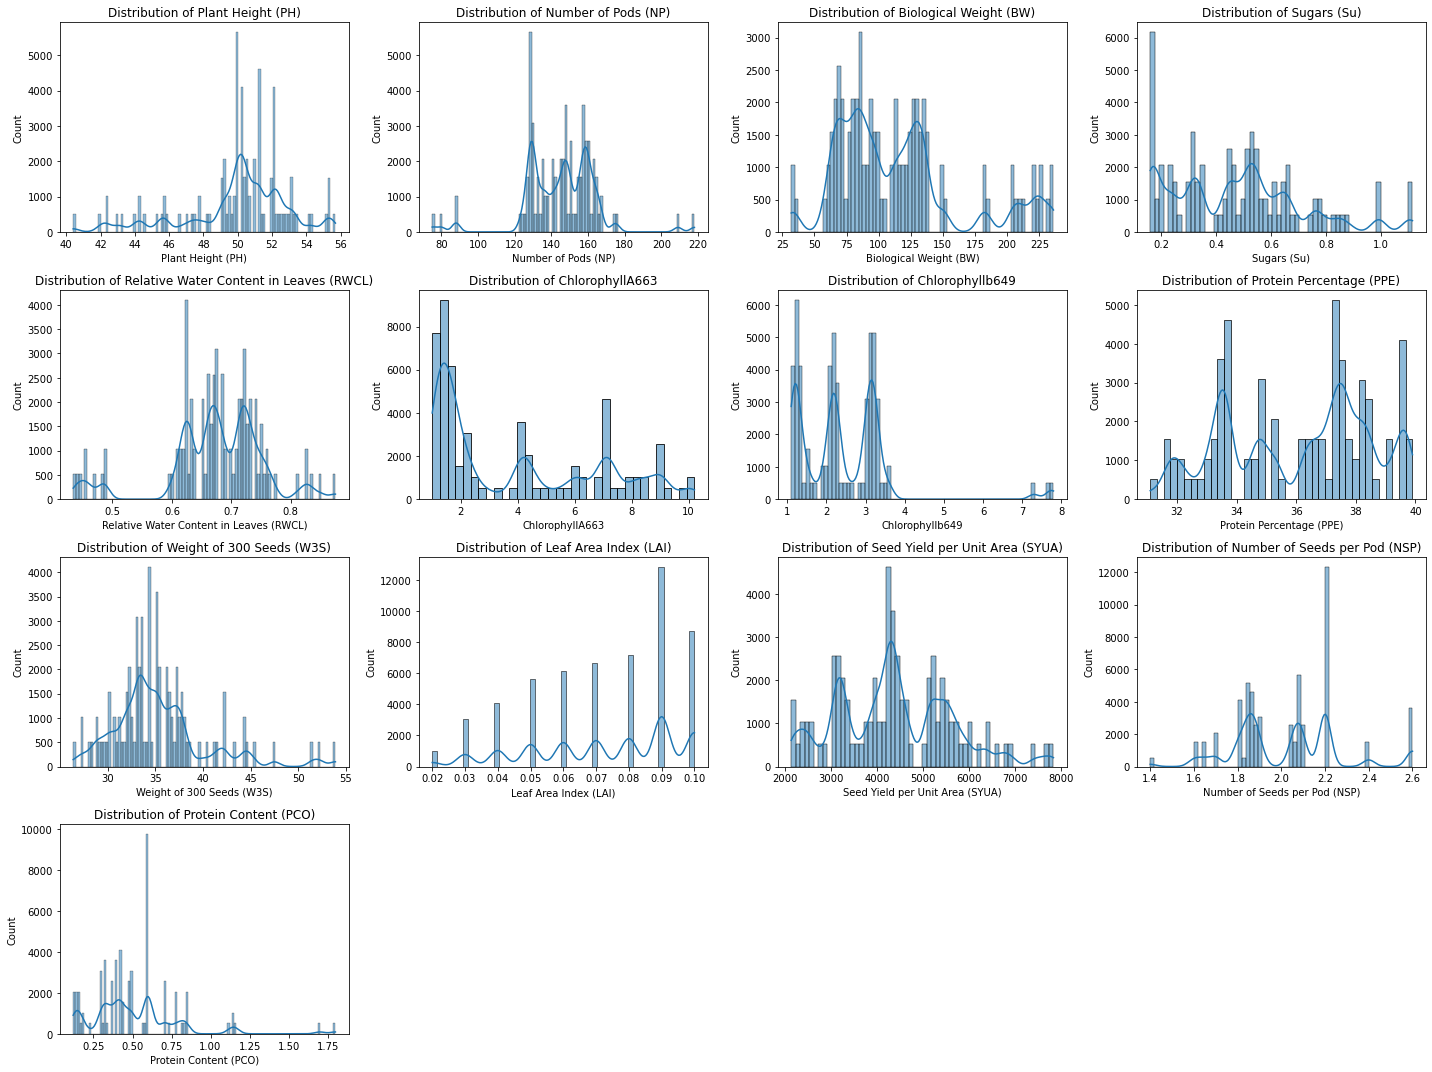

In [25]:
#Numberic features' distribution
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

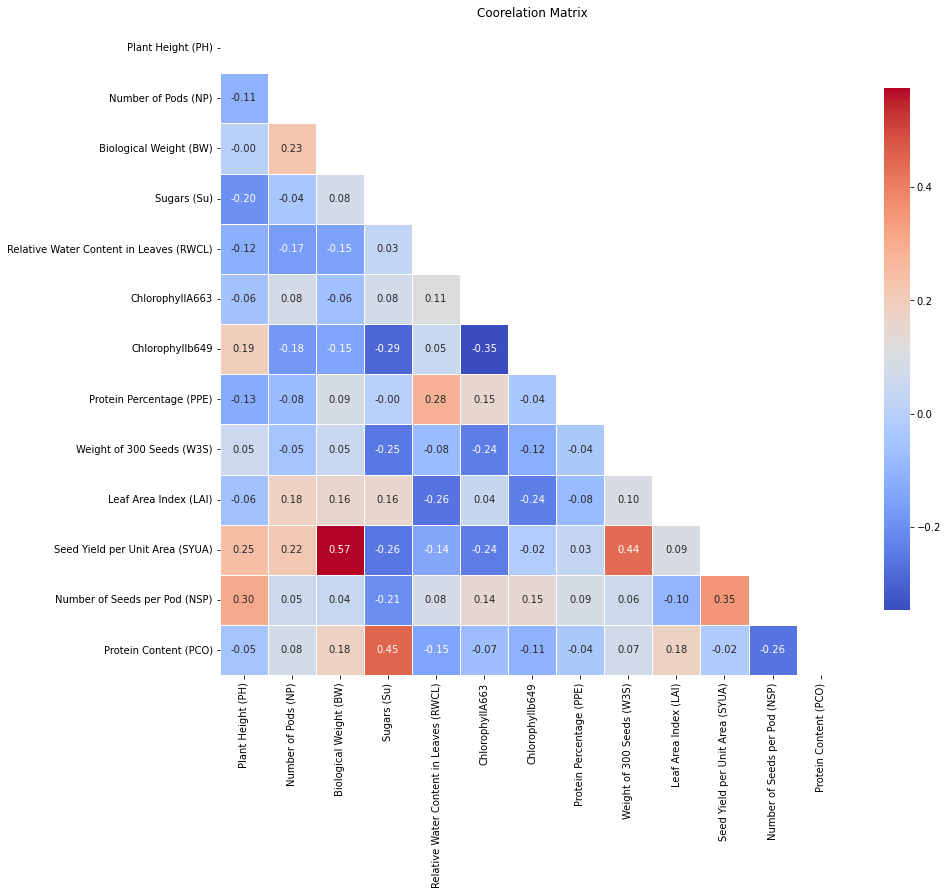

In [26]:
# correlation analysis
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(14, 12))
correlation = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Coorelation Matrix')
plt.show()

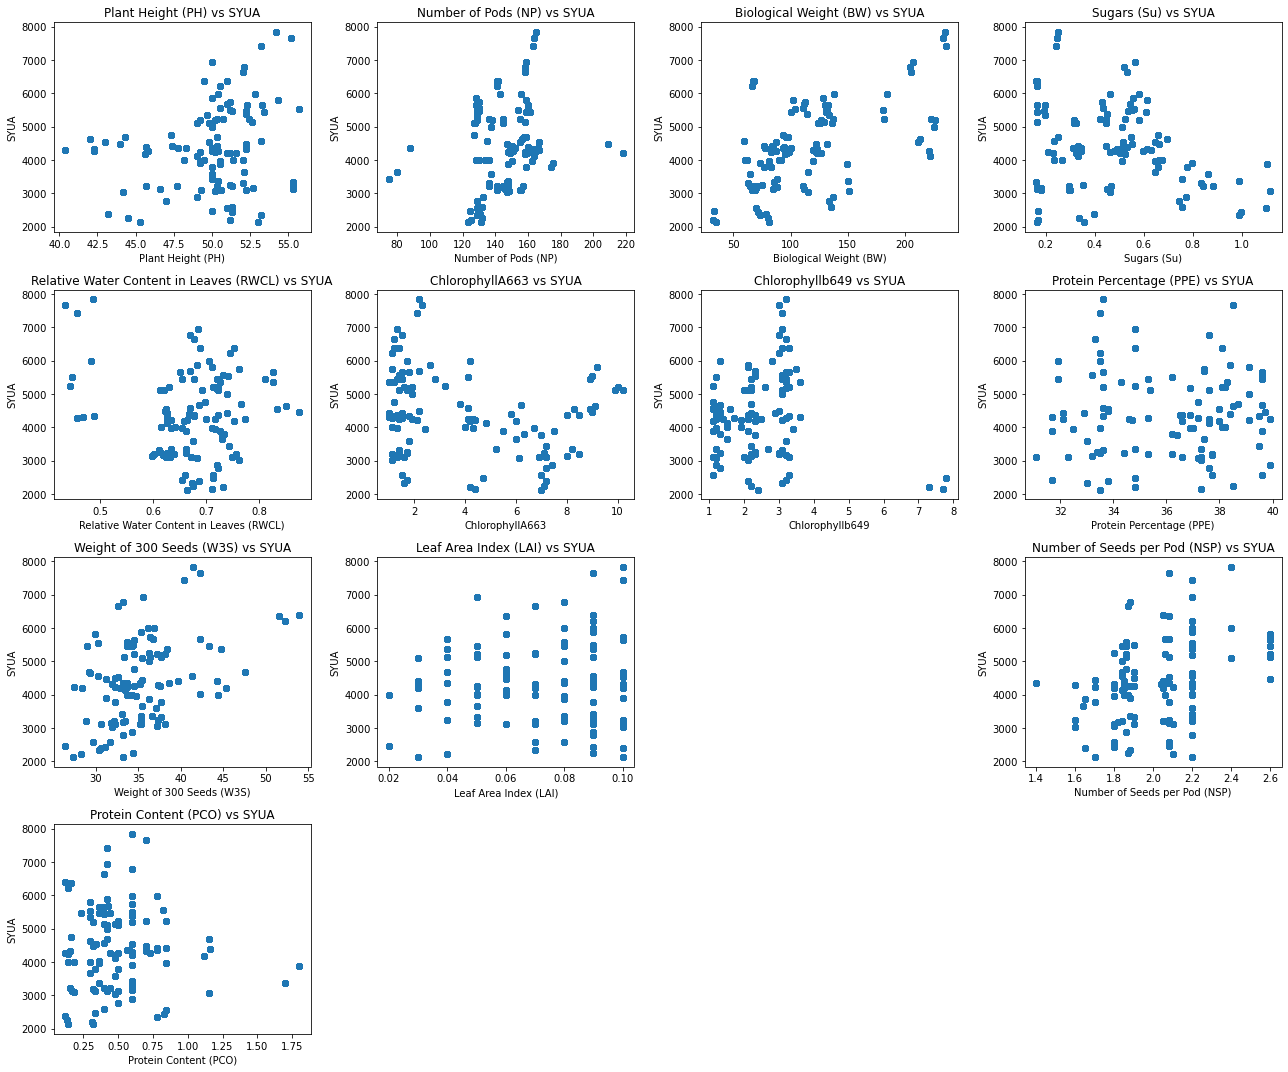

In [28]:
# The relationship between features and SYUA
plt.figure(figsize=(18, 15))
for i, column in enumerate(numeric_cols):
    if column != 'Seed Yield per Unit Area (SYUA)':
        plt.subplot(4, 4, i+1)
        plt.scatter(df[column], df['Seed Yield per Unit Area (SYUA)'], alpha=0.5)
        plt.title(f'{column} vs SYUA')
        plt.xlabel(column)
        plt.ylabel('SYUA')
plt.tight_layout()
plt.show()

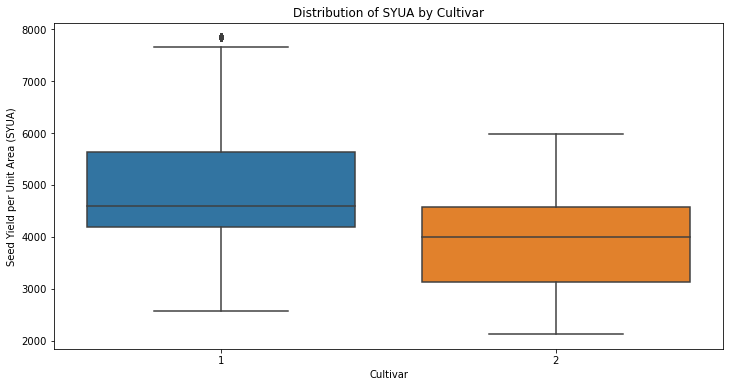

In [29]:
# Group analysis for category features
# Cultivar
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cultivar', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Distribution of SYUA by Cultivar')
plt.show()

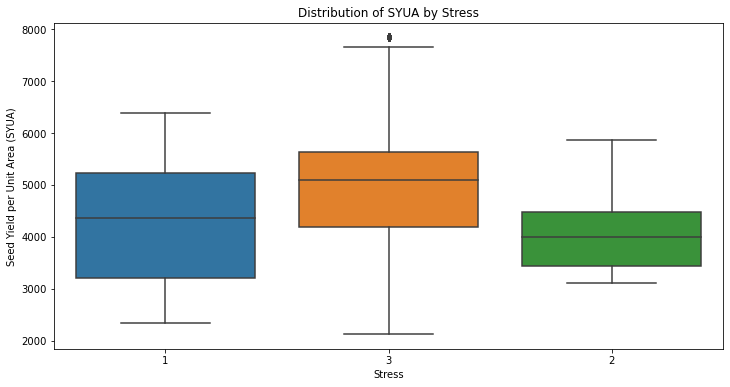

In [33]:
# Stress
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stress', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Distribution of SYUA by Stress')
plt.show()

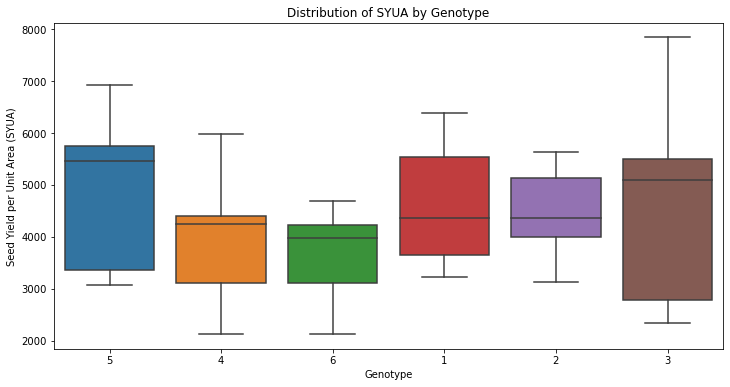

In [32]:
# Genotype
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genotype', y='Seed Yield per Unit Area (SYUA)', data=df)
plt.title('Distribution of SYUA by Genotype')
plt.show()

In [34]:
# Feature selection
# Remove ID and Target
X = df.drop(['Seed Yield per Unit Area (SYUA)', 'Parameters'], axis=1)
y = df['Seed Yield per Unit Area (SYUA)']

In [37]:
# Numberic and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print("\nNumberic features:", numeric_features)
print("\nCategory features:", categorical_features)


Numberic features: ['Plant Height (PH)', 'Number of Pods (NP)', 'Biological Weight (BW)', 'Sugars (Su)', 'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663', 'Chlorophyllb649', 'Protein Percentage (PPE)', 'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)', 'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)']

Category features: ['Random ', 'Cultivar', 'Stress', 'Genotype']


In [38]:
# Split training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Numberic feature standarization; category feature One-Hot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [40]:
# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross Validate
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'CV R²': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    }

In [49]:
# Random forest regression
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Gradient Boosting Regression
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])


# XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, random_state=42))
])
# Train and test each model
models = {
    'Random Forest': rf_pipeline,
    'Gradient Boosting': gb_pipeline,
    'XGBoost': xgb_pipeline
}

In [50]:
results = {}
for name, model in models.items():
    print(f"\nEvaluate {name} model...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name} Result:", results[name])


Evaluate Random Forest model...
Random Forest Result: {'MSE': 8.482653270262488e-23, 'RMSE': 9.210132067599513e-12, 'MAE': 6.9895364919163424e-12, 'R²': 1.0, 'CV R²': 1.0, 'CV R² Std': 0.0}

Evaluate Gradient Boosting model...
Gradient Boosting Result: {'MSE': 3909.6160984437324, 'RMSE': 62.52692298877126, 'MAE': 49.36156064909839, 'R²': 0.9974845054678481, 'CV R²': 0.9973231428032147, 'CV R² Std': 0.0002745939162848839}

Evaluate XGBoost model...
XGBoost Result: {'MSE': 2.1035419704552154e-07, 'RMSE': 0.0004586438673366532, 'MAE': 0.00038979285252187435, 'R²': 0.9999999999998647, 'CV R²': 0.9999999999998914, 'CV R² Std': 6.72157296740909e-15}


In [51]:
# Create the dataframe to store the results
results_df = pd.DataFrame(results).T
print("\Comparing the result:")
display(results_df)

\Comparing the result:


,MSE,RMSE,MAE,R²,CV R²,CV R² Std
Random Forest,8.482653e-23,9.210132e-12,6.989536e-12,1.000000,1.000000,0.000000e+00
Gradient Boosting,3.909616e+03,6.252692e+01,4.936156e+01,0.997485,0.997323,2.745939e-04
XGBoost,2.103542e-07,4.586439e-04,3.897929e-04,1.000000,1.000000,6.721573e-15


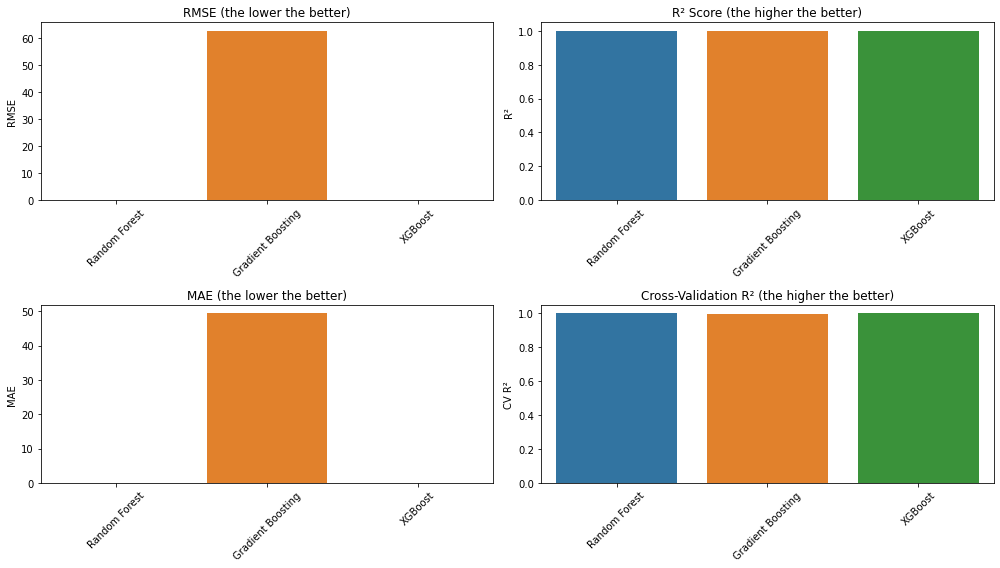

In [52]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title('RMSE (the lower the better)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x=results_df.index, y=results_df['R²'])
plt.title('R² Score (the higher the better)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(x=results_df.index, y=results_df['MAE'])
plt.title('MAE (the lower the better)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.barplot(x=results_df.index, y=results_df['CV R²'])
plt.title('Cross-Validation R² (the higher the better)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [53]:
best_model_name = results_df['R²'].idxmax()
print(f"\nThe best model: {best_model_name}, R² = {results_df.loc[best_model_name, 'R²']:.4f}")


The best model: Random Forest, R² = 1.0000


In [54]:
# Hyperparameters Optimization
if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    }
    best_pipeline = rf_pipeline
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
    best_pipeline = gb_pipeline
    
elif best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
    best_pipeline = xgb_pipeline
    
else:  # Elastic Net
    param_grid = {
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    }
    best_pipeline = en_pipeline

In [55]:
#Searching the best parameters
print(f"\nSearching the best hyperparameters for {best_model_name}...")
grid_search = GridSearchCV(best_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameter: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")


Searching the best hyperparameters for Random Forest...
Best parameter: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best score: 1.0000


In [56]:
# Evaluate optimized model
optimized_model = grid_search.best_estimator_
y_pred = optimized_model.predict(X_test)
optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
optimized_r2 = r2_score(y_test, y_pred)

print(f"\nOptmized {best_model_name} evaluation:")
print(f"RMSE: {optimized_rmse:.2f}")
print(f"R²: {optimized_r2:.4f}")

# Compare to original model
print(f"Original RMSE: {results[best_model_name]['RMSE']:.2f}, Optimized RMSE: {optimized_rmse:.2f}")
print(f"Original R²: {results[best_model_name]['R²']:.4f}, Optimized R²: {optimized_r2:.4f}")



Optmized Random Forest evaluation:
RMSE: 0.00
R²: 1.0000
Original RMSE: 0.00, Optimized RMSE: 0.00
Original R²: 1.0000, Optimized R²: 1.0000
